In [27]:
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as st
from functions import heatmap
from functions import regression
from scipy import stats

In [2]:
#
files=["education_data.csv",
       "incentives.csv",
       "cars_by_state.csv",
       "income_data.csv",
       "new_by_age.csv",
       "state_abbreviations.csv",
       "state_party_counts.csv",
       "stations.csv",
       "tax_state.csv",
      "historical_prices.csv"]
dfs={}
for file in files:
    dfs[file]=pd.read_csv(f"../Resources/{file}")

# Vehicle type summary

In [3]:
summary_df=pd.merge(dfs["cars_by_state.csv"],dfs["state_abbreviations.csv"],how="inner",on="State")
summary_df=summary_df[["Year",
            "State",
            "Abbreviation",
            "Electric (EV)",
            "Plug-In Hybrid Electric (PHEV)",
            "Hybrid Electric (HEV)",
            "Gasoline",
            "Diesel"]]

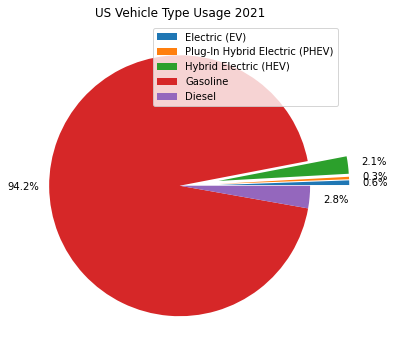

In [4]:
amounts=summary_df[summary_df["Year"]==2021][["Electric (EV)","Plug-In Hybrid Electric (PHEV)","Hybrid Electric (HEV)","Gasoline","Diesel"]].sum()
explode=(.3,.3,.3,0,0,)
plt.figure(figsize=(6,6))
plt.pie(amounts,explode=explode,autopct="%1.1f%%",pctdistance=1.2)
plt.legend(amounts.index)
plt.title("US Vehicle Type Usage 2021")
plt.show()

In [5]:
summary_df["Alternative total"]=summary_df["Electric (EV)"]+summary_df["Plug-In Hybrid Electric (PHEV)"]+summary_df["Hybrid Electric (HEV)"]
summary_df["Fuel total"]=summary_df["Gasoline"]+summary_df["Diesel"]
summary_df["Total vehicles"]=summary_df["Alternative total"]+summary_df["Fuel total"]
summary_df["Alternative Rate(%)"]=round(summary_df["Alternative total"]*100/summary_df["Total vehicles"],3)
reduced_df=summary_df[["Year","State","Abbreviation","Alternative total","Fuel total","Total vehicles","Alternative Rate(%)"]]
reduced_df=reduced_df.sort_values("Alternative Rate(%)", ascending=False)
reduced_df=reduced_df.reset_index(drop=True)

In [6]:
top_reduced_df=reduced_df[reduced_df["Year"]==2021].sort_values("Alternative Rate(%)", ascending=False)
top_reduced_df=top_reduced_df.reset_index(drop=True)
top_reduced_df.head()

,Year,State,Abbreviation,Alternative total,Fuel total,Total vehicles,Alternative Rate(%)
0,2021,District of Columbia,DC,22300,281000,303300,7.352
1,2021,California,CA,2234300,31223100,33457400,6.678
2,2021,Washington,WA,331100,6075600,6406700,5.168
3,2021,Oregon,OR,170400,3312500,3482900,4.892
4,2021,Hawaii,HI,47500,983900,1031400,4.605


In [7]:
bottom_reduced_df=reduced_df[reduced_df["Year"]==2021].sort_values("Alternative Rate(%)")
bottom_reduced_df=bottom_reduced_df.reset_index(drop=True)
bottom_reduced_df.head()

,Year,State,Abbreviation,Alternative total,Fuel total,Total vehicles,Alternative Rate(%)
0,2021,Mississippi,MS,21100,2365900,2387000,0.884
1,2021,Louisiana,LA,31200,3300200,3331400,0.937
2,2021,North Dakota,ND,6200,649800,656000,0.945
3,2021,Alabama,AL,50500,4174500,4225000,1.195
4,2021,Wyoming,WY,6600,544500,551100,1.198


# Population analysis

### Education analysis

In [8]:
ed_df=pd.DataFrame({"State":dfs["education_data.csv"]["State"],
                    "No Education":dfs["education_data.csv"]["No education"],
                    "High School":dfs["education_data.csv"]["High School"]+dfs["education_data.csv"]["GED or alternative"],
                    "Grad School":dfs["education_data.csv"]["associates"]+dfs["education_data.csv"]["Bachelors"],
                    "Post-grad School":dfs["education_data.csv"]["Masters"]+dfs["education_data.csv"]["Professional"]+dfs["education_data.csv"]["Doctorate"]
                   })
education_df=pd.merge(reduced_df[reduced_df["Year"]==2021],ed_df,how="inner",on="State")
education_df.head()

,Year,State,Abbreviation,Alternative total,Fuel total,Total vehicles,Alternative Rate(%),No Education,High School,Grad School,Post-grad School
0,2021,District of Columbia,DC,22300,281000,303300,7.352,6160.0,75562.0,138793.0,175184.0
1,2021,California,CA,2234300,31223100,33457400,6.678,820953.0,5477154.0,7991248.0,3596055.0
2,2021,Washington,WA,331100,6075600,6406700,5.168,70975.0,1150293.0,1754571.0,750433.0
3,2021,Oregon,OR,170400,3312500,3482900,4.892,34201.0,668083.0,915185.0,396281.0
4,2021,Hawaii,HI,47500,983900,1031400,4.605,11896.0,273929.0,338483.0,124019.0


### Age analysis

### Income analysis

# Gas price analysis

### Historical Prices

In [9]:
#Weekly U.S. Regular Conventional Retail Gasoline Prices (Dollars per Gallon)

gas_prices=pd.DataFrame(dfs["historical_prices.csv"])

gas_prices = gas_prices.rename(columns={
    'Weekly U.S. Regular Conventional Retail Gasoline Prices  (Dollars per Gallon)': 'Total U.S.',
    'Weekly East Coast Regular Conventional Retail Gasoline Prices  (Dollars per Gallon)': 'East Coast',
    'Weekly New England (PADD 1A) Regular Conventional Retail Gasoline Prices  (Dollars per Gallon)': 'New England',
    'Weekly Central Atlantic (PADD 1B) Regular Conventional Retail Gasoline Prices  (Dollars per Gallon)': 'Central Atlantic',
    'Weekly Lower Atlantic (PADD 1C) Regular Conventional Retail Gasoline Prices  (Dollars per Gallon)': 'Lower Atlantic',
    'Weekly Midwest Regular Conventional Retail Gasoline Prices  (Dollars per Gallon)': 'Midwest',
    'Weekly Gulf Coast Regular Conventional Retail Gasoline Prices  (Dollars per Gallon)': 'Gulf Coast',
    'Weekly Rocky Mountain Regular Conventional Retail Gasoline Prices  (Dollars per Gallon)': 'Rocky Mountain',
    'Weekly West Coast Regular Conventional Retail Gasoline Prices  (Dollars per Gallon)': 'West Coast'
})

gas_prices 
                               

,Date,Total U.S.,East Coast,New England,Central Atlantic,Lower Atlantic,Midwest,Gulf Coast,Rocky Mountain,West Coast
0,1/4/2010,2.627,2.657,2.725,2.749,2.623,2.625,2.535,2.509,2.795
1,1/11/2010,2.717,2.755,2.801,2.851,2.722,2.716,2.625,2.578,2.870
2,1/18/2010,2.703,2.758,2.805,2.832,2.731,2.672,2.627,2.617,2.870
3,1/25/2010,2.666,2.728,2.785,2.800,2.702,2.614,2.600,2.622,2.860
4,2/1/2010,2.618,2.682,2.748,2.761,2.653,2.555,2.554,2.615,2.840
...,...,...,...,...,...,...,...,...,...,...
680,1/16/2023,3.225,3.252,3.424,3.559,3.158,3.166,3.001,3.292,3.724
681,1/23/2023,3.340,3.376,3.412,3.628,3.301,3.279,3.115,3.434,3.781
682,1/30/2023,3.417,3.469,3.485,3.699,3.401,3.345,3.181,3.544,3.845
683,2/6/2023,3.362,3.411,3.495,3.676,3.331,3.259,3.115,3.694,3.841


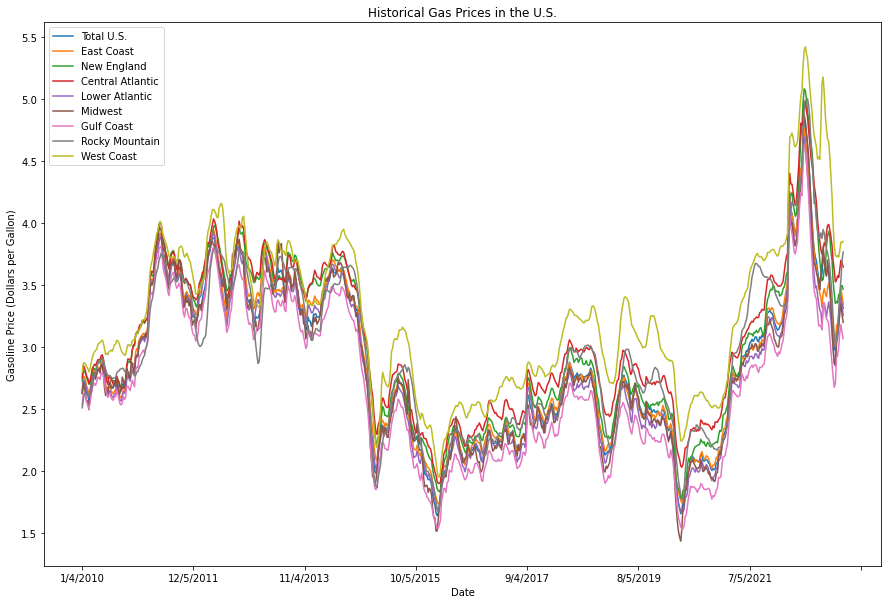

In [10]:
gas_prices.plot(x='Date', figsize=(15, 10))
plt.title('Historical Gas Prices in the U.S.')
plt.xlabel('Date')
plt.ylabel('Gasoline Price (Dollars per Gallon)')
plt.show()

### Tax by state vs # vehicles

In [11]:
Tax_vs_vehicles=pd.merge(dfs["tax_state.csv"],top_reduced_df,how="inner",on="State")
Tax_vs_vehicles=Tax_vs_vehicles[["Year",
            "State",
            "Abbreviation",
            "Gasoline Tax / gallon",
            "Alternative Rate(%)"]]

Tax_vs_vehicles.head()

,Year,State,Abbreviation,Gasoline Tax / gallon,Alternative Rate(%)
0,2021,Alabama,AL,$0.28,1.195
1,2021,Alaska,AK,$0.09,1.802
2,2021,Arizona,AZ,$0.18,3.262
3,2021,Arkansas,AR,$0.25,1.284
4,2021,California,CA,$0.54,6.678


The correlation between Gasoline Tax and Alternative Rate is 0.37 with a p-value of 0.01


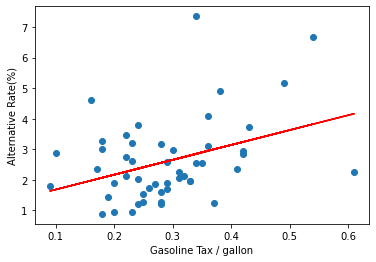

The r-squared value of the linear regression model is 0.14


In [12]:
Tax_vs_vehicles['Gasoline Tax / gallon'] = Tax_vs_vehicles['Gasoline Tax / gallon'].astype(str).str.replace('$', '').astype(float)


corr, pvalue = st.pearsonr(Tax_vs_vehicles['Gasoline Tax / gallon'], Tax_vs_vehicles['Alternative Rate(%)'])
print(f"The correlation between Gasoline Tax and Alternative Rate is {corr:.2f} with a p-value of {pvalue:.2f}")
model = st.linregress(Tax_vs_vehicles['Gasoline Tax / gallon'], Tax_vs_vehicles['Alternative Rate(%)'])
r_squared = model.rvalue**2

y_values = Tax_vs_vehicles['Gasoline Tax / gallon']*model[0]+model[1]
plt.scatter(Tax_vs_vehicles['Gasoline Tax / gallon'],Tax_vs_vehicles['Alternative Rate(%)'])
plt.plot(Tax_vs_vehicles['Gasoline Tax / gallon'],y_values,color="red")
plt.xlabel('Gasoline Tax / gallon')
plt.ylabel('Alternative Rate(%)')
plt.show()

print(f"The r-squared value of the linear regression model is {r_squared:.2f}")

# Political analysis

### Political Party Preference

In [13]:
Party_pref=pd.DataFrame(dfs["state_party_counts.csv"])

Party_pref = Party_pref.rename(columns={
    'state': 'State'})

Party_pref

Party_pref['Political Preference'] = Party_pref['Most Wins'].map({'Republican': 1, 'Neutral':2 , 'Democrat':3})

top_reduced_df["State"] = top_reduced_df["State"].str.upper()
top_reduced_df = top_reduced_df.rename(columns={
    'Alternative Rate(%)': 'AlternativeRate_Pct'})


In [14]:
Political_pref_vs_vehicles = pd.merge(Party_pref, top_reduced_df, on="State")[["State", "Abbreviation", "Most Wins", "Political Preference", "AlternativeRate_Pct"]]

Political_pref_vs_vehicles

,State,Abbreviation,Most Wins,Political Preference,AlternativeRate_Pct
0,ALABAMA,AL,Republican,1,1.195
1,ALASKA,AK,Republican,1,1.802
2,ARIZONA,AZ,Republican,1,3.262
3,ARKANSAS,AR,Republican,1,1.284
4,CALIFORNIA,CA,Democrat,3,6.678
5,COLORADO,CO,Neutral,2,3.450
6,CONNECTICUT,CT,Democrat,3,2.885
7,DELAWARE,DE,Democrat,3,2.606
8,DISTRICT OF COLUMBIA,DC,Democrat,3,7.352
9,FLORIDA,FL,Republican,1,2.537


The correlation between Political Preference and Alternative Rate is 0.64 with a p-value of 0.00


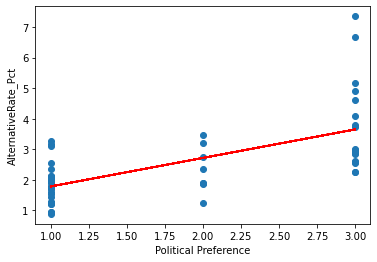

The r-squared value of the linear regression model is 0.41


In [15]:
corr, pvalue = st.pearsonr(Political_pref_vs_vehicles['Political Preference'], Political_pref_vs_vehicles['AlternativeRate_Pct'])
print(f"The correlation between Political Preference and Alternative Rate is {corr:.2f} with a p-value of {pvalue:.2f}")
model = st.linregress(Political_pref_vs_vehicles['Political Preference'], Political_pref_vs_vehicles['AlternativeRate_Pct'])
r_squared = model.rvalue**2

y_values = Political_pref_vs_vehicles['Political Preference']*model[0]+model[1]
plt.scatter(Political_pref_vs_vehicles['Political Preference'],Political_pref_vs_vehicles['AlternativeRate_Pct'])
plt.plot(Political_pref_vs_vehicles['Political Preference'],y_values,color="red")
plt.xlabel('Political Preference')
plt.ylabel('AlternativeRate_Pct')
plt.show()

print(f"The r-squared value of the linear regression model is {r_squared:.2f}")

### T-Test

In [17]:
republican = Political_pref_vs_vehicles[Political_pref_vs_vehicles["Political Preference"]==1]
republican.AlternativeRate_Pct.mean()


1.8444800000000001

In [18]:
democrat = Political_pref_vs_vehicles[Political_pref_vs_vehicles["Political Preference"]==3]
democrat.AlternativeRate_Pct.mean()


3.7337777777777776

In [28]:
stats.ttest_ind(republican.AlternativeRate_Pct, democrat.AlternativeRate_Pct, equal_var=False)
# p-value -> 0.00 / Alpha -> 0.05 => Alpha > p-value => Reject null hypothesis (The means are different)

Ttest_indResult(statistic=-5.036026493630137, pvalue=4.853783005218271e-05)

### Laws and incentives

### Station analysis

In [19]:
# Create stations by state out of list of stations
stationsbystate=dfs["stations.csv"].groupby("state").count()
# stations_df=(,reduced_df
stationsbystate=stationsbystate[["station_name"]]
stationsbystate=stationsbystate.rename(columns={"station_name":"Station count"})
stationsbystate=stationsbystate.reset_index(drop=False)


In [20]:
stationsbystate=pd.merge(stationsbystate,dfs["state_abbreviations.csv"],how="inner",left_on="state",right_on="Abbreviation")
stationsbystate=stationsbystate[["State","Abbreviation","Station count"]]

In [21]:
# heatmap(stationsbystate,"State","Station count")